# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(15)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
pd.set_option('max_columns', None)

Рассмотрим общую информацию о dataframe, 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изучаем доплнительную информацию файла, проанализируем персентили, минимальные и максимальные значения, чтобы выявить явные выбросы на данном этапе, например, квартира площадью 900 кв.м. и высотой потолков 100 метров, объявление по которой было опубликовано 1580 дней - является явным выбросом, эту строку нужно будет удалить, максимальная площадь кухни 112кв.м тоже маловероятное значение. Очень большой разлет стоимости квартиры между 75% перцентилем и максимальной ценой, скорее всего здесь имеют место быть выбросы

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


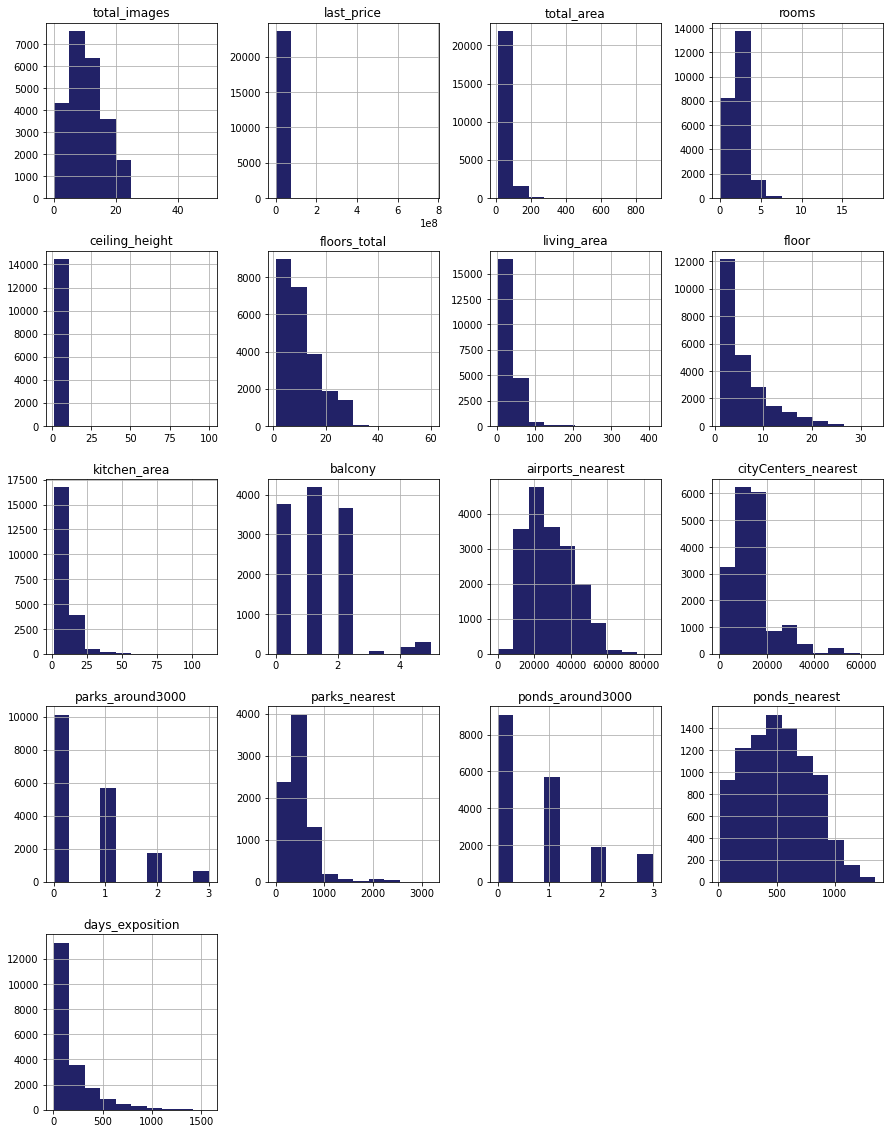

In [5]:
data.hist(figsize=(15, 20), color='#222267');

Преверим количество уникальных значений в столбцах, для принятия решения о смене типа данных в столбцах

In [6]:
data.nunique()

total_images              38
last_price              2978
total_area              2182
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              36
living_area             1782
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             971
balcony                    6
locality_name            364
airports_nearest        8275
cityCenters_nearest     7642
parks_around3000           4
parks_nearest            995
ponds_around3000           4
ponds_nearest           1096
days_exposition         1141
dtype: int64

У нас есть три столбца только с двумя вариантами значений (бинарные), изменим тип:

In [7]:
bin_column = ['is_apartment', 'studio', 'open_plan']
for column in bin_column:
    data[column] = data[column].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим распределение объема объявлений по городам

In [8]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

### Предобработка данных

Вывожу пропущенные значения для каждого столбца

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Более чем в половине столбцов огромное количество пропусков, последовательно обработаем каждый столбец и проанализируем возможность заполнения пропущенных данных:
1) Высота потолков - проверим данные на выбросы и заполним медианным значением с учетом населенного пункта
2) Всего этажей в доме - не заполнять пропуски
3) Жилая площадь в квадратных метрах (м²) - можно заменить пропуски на "0" в сроках, где значение is_apartment - True
4) Апартаменты (булев тип) - пропуски более 75%, крайне сложно заполнить корректно, чтобы не повлиять на результаты и сделать корректные выводы, пропуски не заполняю 
5) Площадь кухни в квадратных метрах (м²) - можно разделить квартиры на категории по количеству комнат, и заполнить средним значением по категориям
6) Число балконов - пропуски заменим значением "0", так как скорее всего если данных нет, то балкон просто отсутствует 
7) Название населённого пункта - оставим пропуски, заполнить невозможно
8) Расстояние до ближайшего аэропорта в метрах (м) - оставим пропуски, заполнить невозможно
9) Расстояние до центра города (м) - оставим пропуски, заполнить невозможно
10) Число парков в радиусе 3 км - оставим пропуски, заполнить невозможно
11) Расстояние до ближайшего парка (м)- оставим пропуски, заполнить невозможно
12) Число водоёмов в радиусе 3 км - оставим пропуски, заполнить невозможно
13) Расстояние до ближайшего водоёма (м) - оставим пропуски, заполнить невозможно
14) Сколько дней было размещено объявление (от публикации до снятия) - не заполнять пропуски, возможно если нет данных, то квартира просто ещё не продана


Проверим уникальные значение на возможные ошибки ввода или отображения данных, а также выбросы, перед тем как заполнять пропуски медианным значением

In [10]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Данные столбца требую корректировки, есть явные выбросы 1 и 100, есть ошибки в заполнении данных, например 26, очевидно что не проставили разделитель дробного числа (25, 26, 27, 32, 24, 20, 22.6, 27.5), чистим данные:

In [11]:
data.loc[data['ceiling_height'] == 25., 'ceiling_height'] = 2.5 
data.loc[data['ceiling_height'] == 32., 'ceiling_height'] = 3.2 
data.loc[data['ceiling_height'] == 27., 'ceiling_height'] = 2.7 
data.loc[data['ceiling_height'] == 24., 'ceiling_height'] = 2.4 
data.loc[data['ceiling_height'] == 26., 'ceiling_height'] = 2.6 
data.loc[data['ceiling_height'] == 14., 'ceiling_height'] = 4
data.loc[data['ceiling_height'] == 20., 'ceiling_height'] = 2
data.loc[data['ceiling_height'] == 22.6, 'ceiling_height'] = 2.26
data.loc[data['ceiling_height'] == 27.5, 'ceiling_height'] = 2.75

data = data[(data['ceiling_height'] != 1) & (data['ceiling_height'] != 100)]

        

Проверяем уникальные значения после обработки

In [12]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Проверим на аномалии и неявные дубликаты значения столбца 

In [13]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Избавляемся от неявных дубликатов в наименовниях населенных пунктов

In [14]:
data.loc[data['locality_name'] == 'поселок Мурино', 'locality_name'] = 'посёлок Мурино'
data.loc[data['locality_name'] == 'Мурино', 'locality_name'] = 'посёлок Мурино'
data.loc[data['locality_name'] == 'городской поселок Янино-1', 'locality_name'] = 'городской посёлок Янино-1'
data.loc[data['locality_name'] == 'поселок городского типа Лебяжье', 'locality_name'] = 'посёлок городского типа Лебяжье'
data.loc[data['locality_name'] == 'поселок Новый Свет', 'locality_name'] = 'посёлок Новый Свет'
data.loc[data['locality_name'] == 'поселок Пансионат Зелёный Бор', 'locality_name'] = 'посёлок Пансионат Зелёный Бор'
data.loc[data['locality_name'] == 'поселок городского типа имени Свердлова', 'locality_name'] = 'посёлок городского типа имени Свердлова'
data.loc[data['locality_name'] == 'поселок Поляны', 'locality_name'] = 'посёлок Поляны'
data.loc[data['locality_name'] == 'поселок городского типа Вырица', 'locality_name'] = 'посёлок городского типа Вырица'
data.loc[data['locality_name'] == 'село Павлово', 'locality_name'] = 'городской посёлок Павлово'
data.loc[data['locality_name'] == 'Кудрово', 'locality_name'] = 'деревня Кудрово'
data.loc[data['locality_name'] == 'поселок Аннино', 'locality_name'] = 'посёлок Аннино'
data.loc[data['locality_name'] == 'поселок Тельмана', 'locality_name'] = 'посёлок Тельмана'
data.loc[data['locality_name'] == 'поселок городского типа Красный Бор', 'locality_name'] = 'посёлок городского типа Красный Бор'
data.loc[data['locality_name'] == 'Никольское', 'locality_name'] = 'село Никольское'
data.loc[data['locality_name'] == 'деревня Фёдоровское', 'locality_name'] = 'городской посёлок Фёдоровское'
data.loc[data['locality_name'] == 'Любань', 'locality_name'] = 'поселок Любань'
data.loc[data['locality_name'] == 'поселок Лисий Нос', 'locality_name'] = 'посёлок Лисий Нос'





Заменим пропуски nan в столбце 'floors_total' пустым значением

In [15]:
data.loc[data['floors_total'] == 'nan', 'floors_total'] = ' ' 

Заменим пропуски nan в столбце 'locality_name' пустым значением

In [16]:
data.loc[data['locality_name'] == 'nan', 'locality_name'] = ' ' 

После обработки аномалий заполним пропуски в столбце 'ceiling_height' медианными значениями по населенным пунктам:

In [17]:
warnings.simplefilter('ignore')

In [18]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == t), 'ceiling_height'].median()


У некоторых населенных пунктов отсутствуют значения 'ceiling_height', заменим оставшиеся пропуски средним значением

In [19]:
data.loc[data['ceiling_height'] == 'nan', 'ceiling_height'] = 2.55

Заполним пропуски в столбце 'kitchen_area' медианными значениями по населенным пунктам:

In [20]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['locality_name'] == t), 'kitchen_area'].median()

Удаляем пропуски в столбце 'balcony' исходя из логики, что если данные отсутствуют, то балкона нет 

In [21]:
data['balcony'] = data['balcony'].fillna(0) 

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            154
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               28
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [23]:
data.groupby('locality_name')['kitchen_area'].agg('median')

locality_name
Бокситогорск             6.00
Волосово                 8.30
Волхов                   6.80
Всеволожск              10.00
Выборг                   8.00
                        ...  
село Путилово            7.85
село Рождествено         8.15
село Русско-Высоцкое    10.70
село Старая Ладога       6.00
село Шум                 6.50
Name: kitchen_area, Length: 346, dtype: float64

Проверка данных на дубликаты:

In [24]:
data.duplicated().sum()

0

### Посчитайте и добавьте в таблицу новые столбцы

Посчитаем и добавим в таблицу информацию о стоимости одного квадратного метра

In [111]:
data['price_metr']=data['last_price']/data['total_area']
data.head(15)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month,year,floor_categorize,days_exposition_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16.028,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,other,None
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18.603,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,first,normal
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13.933,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,other,anomaly_long
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,True,False,False,9.90,0.0,Санкт-Петербург,28098.0,6.800,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,other,anomaly_long
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8.098,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,other,long
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,other,normal
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,True,False,False,14.40,1.0,посёлок Парголово,52996.0,19.143,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,other,long
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,NaN,22,True,False,False,18.90,2.0,Санкт-Петербург,23982.0,11.634,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,other,None
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,True,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,other,long
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2.0,Санкт-Петербург,50898.0,15.008,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,other,long


Сразу посмотрим на общую картину разброса стоимости квадратного метра

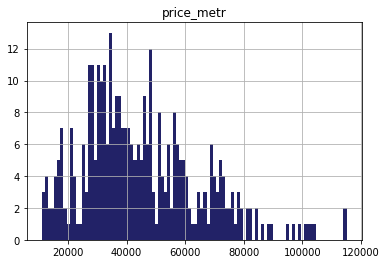

In [26]:
data_pivot=data.pivot_table(index=['locality_name'], values=['price_metr'])
data_pivot.hist(bins=100, color='#222267');

Изменим тип столбца 'first_day_exposition' на более удобный тип для даты

In [27]:

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,True,False,False,9.90,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,True,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,NaN,22,True,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,True,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164


Добавляем в таблицу день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [28]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,True,False,False,9.90,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,True,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,NaN,22,True,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,True,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6


Добавляем столбец с данными о месяце размещения объявления

In [1]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data.head(15)

NameError: name 'pd' is not defined

Добавляем столбец с информацией о годе размещения объявления

In [30]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month,year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,True,False,False,9.90,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,True,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,NaN,22,True,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,True,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017


Добавляем столбец с категорией этажа

In [31]:
conditions = [data['floor'] == data['floors_total'], data['floor'] == 1]
choices = ['last', 'first']
data['floor_categorize']  = np.select (conditions, choices, default='other')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month,year,floor_categorize
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,other
1,7,3350000.0,40.40,2018-12-04,1,2.63,11.0,18.60,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,first
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.30,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,other
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,NaN,9,True,False,False,9.90,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,other
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,other
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,other
6,6,3700000.0,37.30,2017-11-02,1,2.64,26.0,10.60,6,True,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,other
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,NaN,22,True,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,other
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,True,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,other
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,other


Переведем данные столбца 'cityCenters_nearest' в километры

In [32]:
data['cityCenters_nearest'] = data['cityCenters_nearest']/1000
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month,year,floor_categorize
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0.0,Санкт-Петербург,18863.0,16.028,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,other
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,True,False,False,11.0,2.0,посёлок Шушары,12817.0,18.603,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,first
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13.933,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,other
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,True,False,False,9.9,0.0,Санкт-Петербург,28098.0,6.800,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,other
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,0.0,Санкт-Петербург,31856.0,8.098,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,other


Построим гистограму по столбцу total_area

Text(0, 0.5, 'Количество')

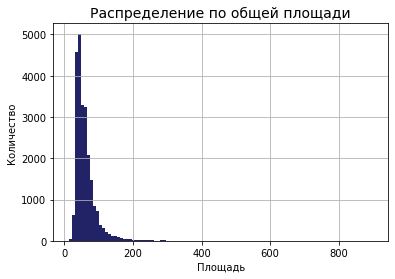

In [33]:
data['total_area'].hist(bins=100, color='#222267')
plt.title('Распределение по общей площади', fontsize=14)
plt.xlabel('Площадь')
plt.ylabel('Количество')

Основная масса обявлений с квартирами площадью 50-70 кв.м., очень смущает большое количество единичных данных с огромными значениями, посмотрим на данные столбца под другим углом:

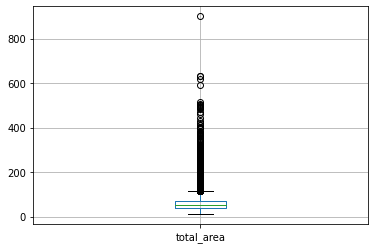

In [34]:
data.boxplot('total_area');

Значения более 100 кв.м. выходять в зону, которую можно посчитать выбросом, но исходя из того, что таких значений много и они единичные, я скорее бы предположила, что имеет место быть ошибка в вводе данных, возможно не там проставлена точка, соответственно 900 - это 90 кв.м. 

Рассмотрим данные столбца 'total_area', которые похожи на выбросы, чтобы проверить гипотезу об ошибке при вводе данных.
Скорее всего это действительно большие квартиры в центре Санкт-Петербурга, с огромной площадью и комнатами, очень большой разброс по стоимости квадратного метра таких квартир и по сроку размещения, возможно правильным будет всё же классифицировать такие объявления как выбросы, тобы общая картина для анализа была более однородная, но с другой стороны это тоже ценные данные, скорее всего в них нет ошибки, просто можно выделить их в отдельную категорию при анализе

In [35]:
data.loc[data['total_area'] >= 300]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month,year,floor_categorize
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,True,False,False,9.9,1.0,Санкт-Петербург,22673.0,1.771,2.0,508.0,3.0,366.0,62.0,302839.116719,4,7,2017,last
581,20,65000000.0,365.0,2019-03-18,7,2.90,7.0,NaN,7,True,False,False,9.9,0.0,Санкт-Петербург,19827.0,1.690,3.0,378.0,3.0,58.0,NaN,178082.191781,0,3,2019,last
660,3,49950000.0,483.9,2017-10-04,7,3.20,6.0,312.5,4,True,False,False,26.4,0.0,Санкт-Петербург,23079.0,0.945,3.0,461.0,3.0,22.0,391.0,103223.806572,2,10,2017,other
793,20,135000000.0,310.0,2018-05-22,4,3.30,5.0,250.0,2,True,False,False,50.0,0.0,Санкт-Петербург,34159.0,7.251,2.0,295.0,3.0,190.0,342.0,435483.870968,1,5,2018,other
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,True,False,False,16.6,0.0,Санкт-Петербург,38076.0,7.950,0.0,NaN,2.0,435.0,418.0,68870.523416,5,12,2017,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20919,20,54000000.0,300.0,2019-03-21,6,3.00,5.0,170.0,5,True,False,False,20.0,0.0,Санкт-Петербург,24825.0,5.509,0.0,NaN,0.0,NaN,NaN,180000.000000,3,3,2019,last
21955,19,130000000.0,431.0,2017-10-02,7,3.70,8.0,220.0,5,True,False,False,20.0,5.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0,301624.129930,0,10,2017,other
21990,20,68000000.0,373.1,2018-09-08,8,2.70,8.0,176.2,8,True,False,False,29.4,0.0,Санкт-Петербург,37965.0,7.873,1.0,562.0,3.0,691.0,234.0,182256.767623,5,9,2018,last
22131,14,27000000.0,422.2,2018-10-18,5,2.70,13.0,NaN,11,True,False,False,9.9,0.0,Санкт-Петербург,46625.0,16.554,0.0,NaN,0.0,NaN,NaN,63950.734249,3,10,2018,other


Рассмотрим данные столбца 'living_area'

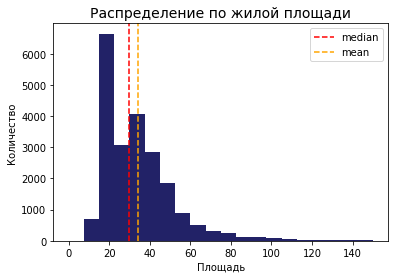

In [36]:
plt.hist(data['living_area'], bins=20, color='#222267', range = (0, 150))
plt.axvline(data['living_area'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data['living_area'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по жилой площади', fontsize=14)
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.legend();

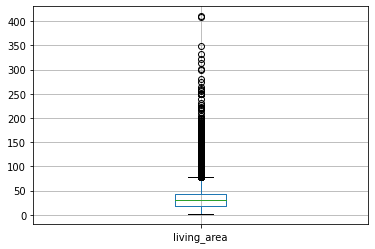

In [37]:
data.boxplot('living_area');

Аналогичная ситуация, что и со значениями столбца 'living_area'

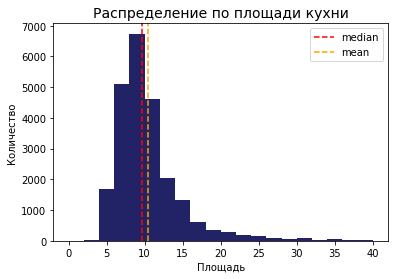

In [38]:
plt.hist(data['kitchen_area'], bins=20, color='#222267', range = (0, 40))
plt.axvline(data['kitchen_area'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data['kitchen_area'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по площади кухни', fontsize=14)
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.legend();

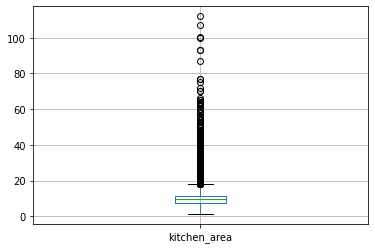

In [39]:
data.boxplot('kitchen_area');

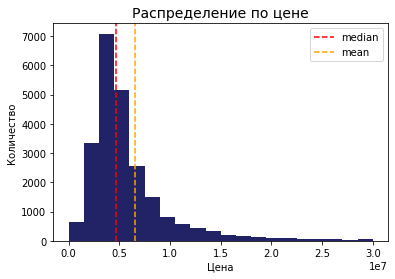

In [40]:
plt.hist(data['last_price'], bins=20, color='#222267', range = (0, 30000000))
plt.axvline(data['last_price'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data['last_price'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по цене', fontsize=14)
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.legend();


Логично, что основной массив объявлений квартир 1-3 комнатных, всё что больше, это уже единичные значения

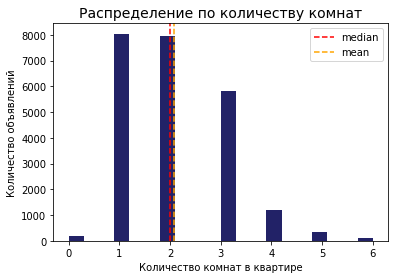

In [41]:
plt.hist(data['rooms'], bins=20, color='#222267', range = (0, 6))
plt.axvline(data['rooms'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data['rooms'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по количеству комнат', fontsize=14)
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Количество объявлений')
plt.legend();

Квартиры с более чем с шестью комнатами это скорее выбросы и их можно удалить

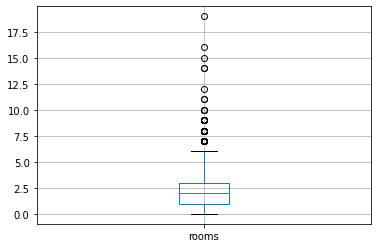

In [42]:
data.boxplot('rooms');

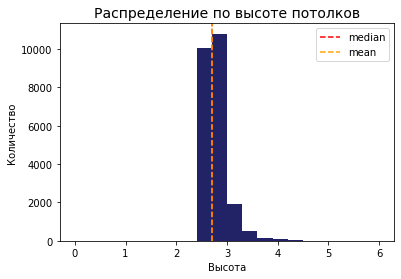

In [43]:

plt.hist(data['ceiling_height'], bins=20, color='#222267', range = (0, 6))
plt.axvline(data['ceiling_height'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data['ceiling_height'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по высоте потолков', fontsize=14)
plt.xlabel('Высота')
plt.ylabel('Количество')
plt.legend();

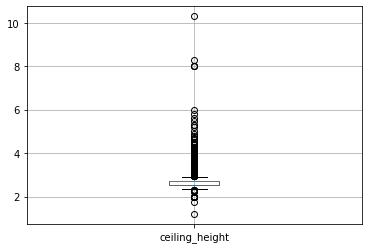

In [44]:
data.boxplot('ceiling_height');

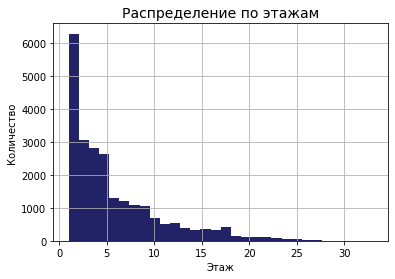

In [45]:
data['floor'].hist(bins=30,color='#222267')
plt.title('Распределение по этажам', fontsize=14)
plt.xlabel('Этаж')
plt.ylabel('Количество');

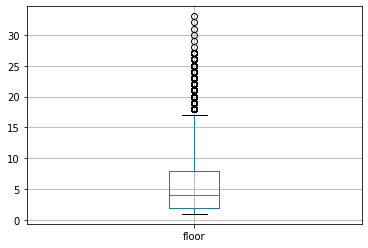

In [46]:
data.boxplot('floor');

В выборке квартир на первых и последних этажах сопоставимое количество

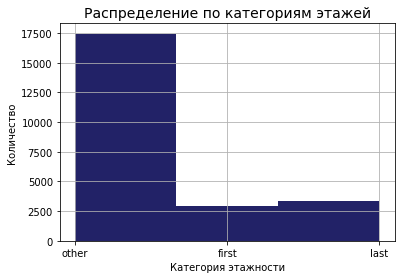

In [47]:
data['floor_categorize'].hist(bins=3,color='#222267')
plt.title('Распределение по категориям этажей', fontsize=14)
plt.xlabel('Категория этажности')
plt.ylabel('Количество');

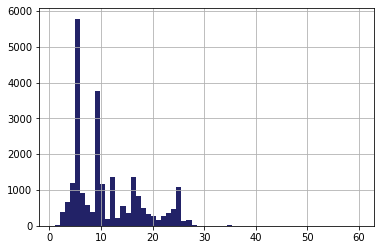

In [48]:
data['floors_total'].hist(bins=60, color='#222267');

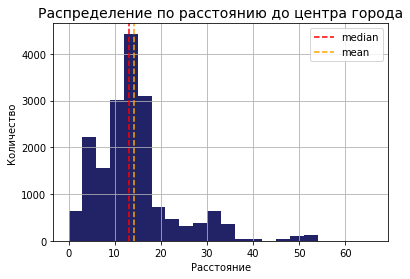

In [49]:
data['cityCenters_nearest'].hist(bins=100)
plt.hist(data['cityCenters_nearest'], bins=20, color='#222267', range = (0, 60))
plt.axvline(data['cityCenters_nearest'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data['cityCenters_nearest'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по расстоянию до центра города', fontsize=14)
plt.xlabel('Расстояние')
plt.ylabel('Количество')
plt.legend();

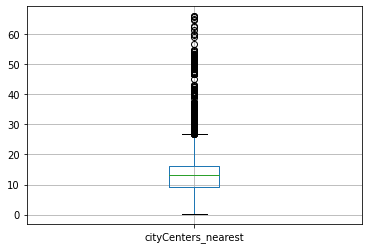

In [50]:
data.boxplot('cityCenters_nearest');

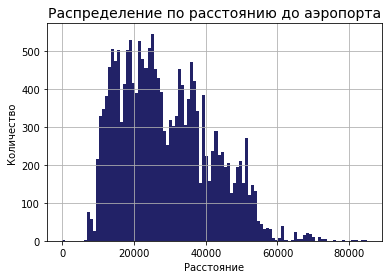

In [51]:
data['airports_nearest'].hist(bins=100, color='#222267')
plt.title('Распределение по расстоянию до аэропорта', fontsize=14)
plt.xlabel('Расстояние')
plt.ylabel('Количество');

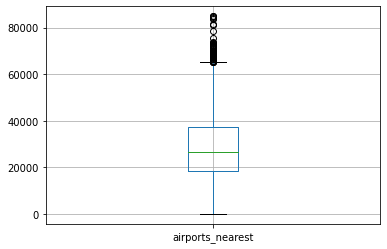

In [52]:
data.boxplot('airports_nearest');

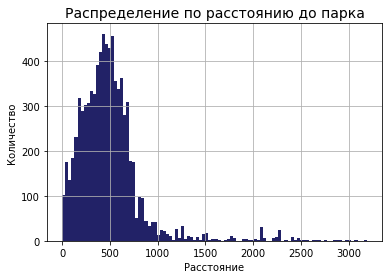

In [53]:
data['parks_nearest'].hist(bins=100, color='#222267')
plt.title('Распределение по расстоянию до парка', fontsize=14)
plt.xlabel('Расстояние')
plt.ylabel('Количество');

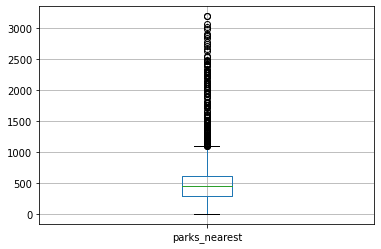

In [54]:
data.boxplot('parks_nearest');

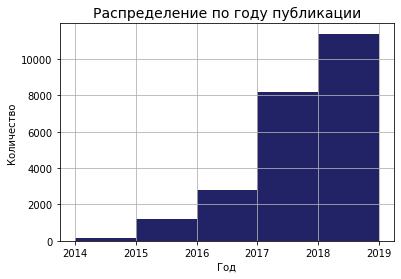

In [55]:
data['year'].hist(bins=5, color='#222267')
plt.title('Распределение по году публикации', fontsize=14)
plt.xlabel('Год')
plt.ylabel('Количество');

Объемы размещения объявлений о продаже квартир в течение календарного года распределено не равномерно, есть месяцы явно низкой активности и максимального объема размещения соответственно, низкая активность: январь, декабрь и май, а высокая активность: февраль, март, апрель и ноябрь

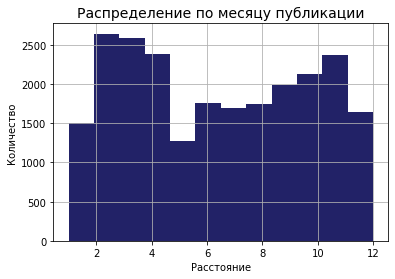

In [56]:
data['month'].hist(bins=12, color='#222267')
plt.title('Распределение по месяцу публикации', fontsize=14)
plt.xlabel('Расстояние')
plt.ylabel('Количество');

### Проведите исследовательский анализ данных

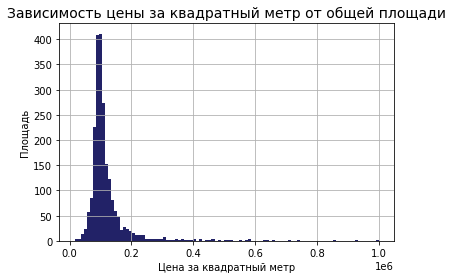

In [57]:
data_pivot=data.pivot_table(index=['total_area'], values=['price_metr'])
data_pivot.hist(bins=100, color='#222267');
plt.title('Зависимость цены за квадратный метр от общей площади', fontsize=14)
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Площадь');


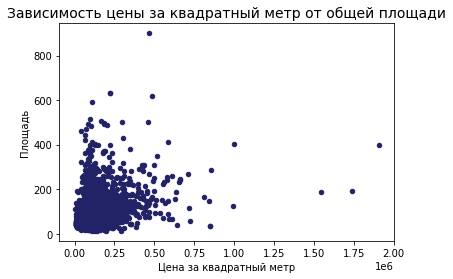

In [58]:
data.plot.scatter (x = 'price_metr', y = 'total_area', color='#222267')
plt.title('Зависимость цены за квадратный метр от общей площади', fontsize=14)
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Площадь');

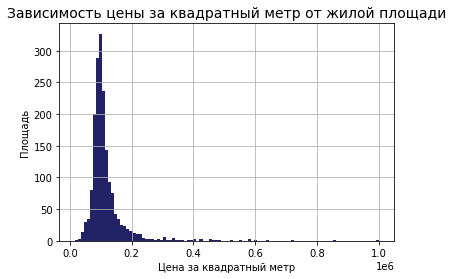

In [59]:
data_pivot=data.pivot_table(index=['living_area'], values=['price_metr'])
data_pivot.hist(bins=100, color='#222267')
plt.title('Зависимость цены за квадратный метр от жилой площади', fontsize=14)
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Площадь');

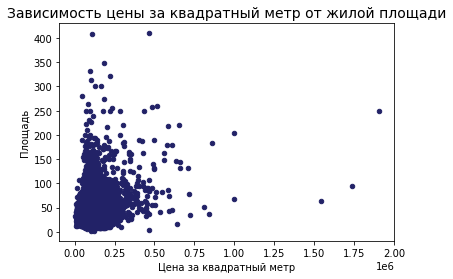

In [60]:
data.plot.scatter (x = 'price_metr', y = 'living_area', color='#222267')
plt.title('Зависимость цены за квадратный метр от жилой площади', fontsize=14)
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Площадь');

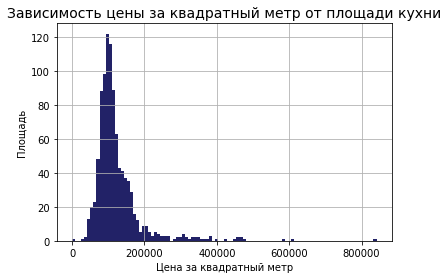

In [61]:
data_pivot=data.pivot_table(index=['kitchen_area'], values=['price_metr'])
data_pivot.hist(bins=100, color='#222267')
plt.title('Зависимость цены за квадратный метр от площади кухни', fontsize=14)
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Площадь');

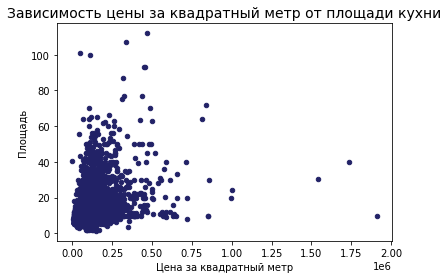

In [62]:
data.plot.scatter (x = 'price_metr', y = 'kitchen_area', color='#222267')
plt.title('Зависимость цены за квадратный метр от площади кухни', fontsize=14)
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Площадь');

Посмотрим на зависимость цены за квадратный метр от количества комнат.
Стоимость квадратного метра у квартир с количеством комнат более пяти мы не будем сравнивать, т.к. в выборке из мсовсем немного по отношению с 1,2 и 3 комнатными квартирами.
У однокомнатных квартир средняя и медианная стоимость почти одинаковая, значит данные однородны, двухкомнатных квартир в выборке почти столько же, цена за квадратный метр примерно на 7% ниже. У трехкомнатных квартир значительная разница в значении медианы и среднего, скорее всего есть выбросы, будем ориентироваться по медиане, цена за квадратный метр ещё ниже, чем у двухкомнатных. Есть категория квартир-студий, там цена за квадратный метр самая высокая. Соответственно, чем больше комнат в квартире, тем ниже цена за квадратный метр.

In [63]:
data_pivot=data.pivot_table(index=['rooms'], values=['price_metr'], aggfunc=['count', 'mean', 'median'])
data_pivot

,count,mean,median
,price_metr,price_metr,price_metr
rooms,,,
0,197,108513.114092,105555.555556
1,8046,100756.224245,100000.000000
2,7939,95487.946594,92785.714286
3,5814,97151.150139,88983.050847
4,1180,110331.605116,92666.666667
5,326,126750.342565,96517.068099
6,105,140718.807406,99411.764706
7,59,163569.923180,108827.085852


Что касается категорий этажей, здесь всё закономерно, квартиры на первом и последнем этажах дешевле, самая низкая стоимость квадратного метра у квартир на первом этаже

In [64]:
data_pivot=data.pivot_table(index=['floor_categorize'], values=['price_metr'], aggfunc=['count', 'mean','median'])
data_pivot

,count,mean,median
,price_metr,price_metr,price_metr
floor_categorize,,,
first,2892,82296.093176,81302.847198
last,3360,92905.919754,87531.676354
other,17445,103486.417435,98290.598291


In [65]:
data_pivot=data.pivot_table(index=['month'], values=['price_metr'], aggfunc=['count', 'mean', 'median'])
data_pivot

,count,mean,median
,price_metr,price_metr,price_metr
month,,,
1,1500,99862.581241,95222.437478
2,2640,98768.735441,95000.000000
3,2587,98973.216068,95238.095238
4,2379,101949.026219,96451.612903
5,1274,98543.764569,92857.142857
6,1760,97763.317183,92799.539171
7,1694,99330.261132,95000.000000
8,1744,100110.528446,96026.315789


In [66]:
data_pivot=data.pivot_table(index=['year'], values=['price_metr'], aggfunc=['count', 'mean', 'median'])
data_pivot

,count,mean,median
,price_metr,price_metr,price_metr
year,,,
2014,137,124830.426426,107000.000000
2015,1191,104614.200153,93414.634146
2016,2783,98322.343248,91743.119266
2017,8190,97621.876525,92565.088448
2018,8517,97713.261675,95687.331536
2019,2879,107123.780305,103305.785124


In [67]:
data_pivot=data.pivot_table(index=['weekday_exposition'], values=['price_metr'], aggfunc=['count', 'mean', 'median'])
data_pivot

,count,mean,median
,price_metr,price_metr,price_metr
weekday_exposition,,,
0,3612,99438.432027,94688.910380
1,4183,99734.539194,95634.095634
2,3972,99488.819061,95462.172056
3,4295,100162.906153,95143.884892
4,4000,99012.143458,94616.160238
5,1936,99018.170245,93545.716727
6,1699,97708.373982,94501.718213


Подробнее рассмотрим данные столбца по количеству дней размещения, здесь у нас очень большой разлет значений, посмотри среднее и медианое значение

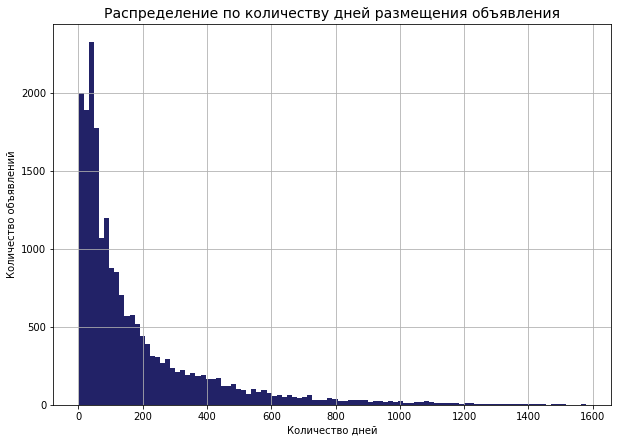

In [68]:
data['days_exposition'].hist(bins=100, color='#222267', figsize=(10,7));
plt.title('Распределение по количеству дней размещения объявления', fontsize=14)
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений');

In [69]:
days_exposition_mean = data['days_exposition'].mean()
days_exposition_mean

180.90470852017938

In [70]:
days_exposition_median = data['days_exposition'].median()
days_exposition_median

95.0

Медиана почти в два раза меньше среднего, в столбце явно есть выбросы.
Судя по графику, основная масса квартир продаются за 50-70 дней, из-за того что разлет значений большой, неудобно смотреть данные, можно разбить на категории. Продажи менее 10 дней обозначим, как аномально быстрые (риэлторы зачастую публикуют фиктивные объявления о продаже на короткий срок, для увеличения цены по очету об оценке), также выделяем аномально долгие продажи - это тоже могут быть фиктивные объявления для привлечения клиентов, например, если человек обратится по такому фиктивному объявлению, ему сообщают, что такой квартиры уже нет, но есть подобные и т.д.

In [71]:
def categorize_days_exposition(days_exposition):
    try:
        if 0 <= days_exposition <= 10:
            return 'anomaly_fast'
        elif 11 <= days_exposition <= 30:
            return 'fast'
        elif 31 <= days_exposition <= 90:
            return 'normal'
        elif 91 <= days_exposition <= 365:
            return 'long'
        elif days_exposition >= 366:
            return 'anomaly_long'
    except:
        pass

In [72]:
data['days_exposition_category'] = data['days_exposition'].apply(categorize_days_exposition)

In [73]:
data_pivot=data.pivot_table(index=['days_exposition_category'], values=['price_metr'], aggfunc=['count', 'mean', 'median'])
data_pivot

,count,mean,median
,price_metr,price_metr,price_metr
days_exposition_category,,,
anomaly_fast,1257,99324.133236,96428.571429
anomaly_long,3044,102621.518516,94444.444444
fast,2479,99636.247090,96491.228070
long,7525,97475.961075,93128.390597
normal,5990,93793.033168,92556.087578


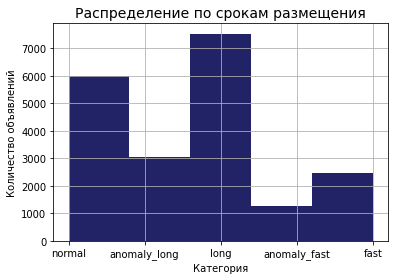

In [74]:
data['days_exposition_category'].hist(bins=5, color='#222267')
plt.title('Распределение по срокам размещения', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Количество объявлений');

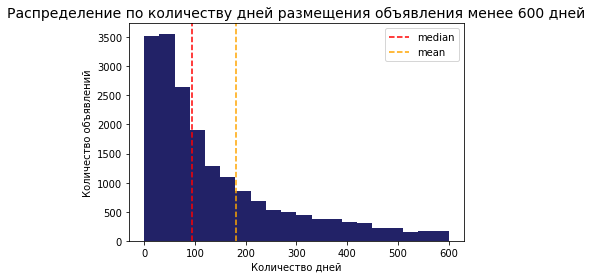

In [75]:
plt.hist(data['days_exposition'], bins=20, color='#222267', range = (0, 600))
plt.axvline(data['days_exposition'].median(), color='red', linestyle= '--', label='median')
plt.axvline(data['days_exposition'].mean(), color='orange', linestyle= '--', label='mean')
plt.title('Распределение по количеству дней размещения объявления менее 600 дней', fontsize=14)
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений');
plt.legend();

In [76]:
corr = data.corr()
corr

,total_images,last_price,total_area,rooms,ceiling_height,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month,year
total_images,1.000000,0.104543,0.115299,0.099229,0.052992,0.104721,0.031320,0.039873,-0.029308,-0.024411,0.105123,0.049294,-0.002270,-0.047738,0.021072,-0.008449,-0.011403,-0.003273,-0.026679,0.133791,-0.010443,0.005009,0.140443
last_price,0.104543,1.000000,0.653729,0.363387,0.280031,0.566544,0.026582,0.000629,-0.025360,-0.008801,0.442689,0.008411,-0.026253,-0.206729,0.151069,-0.016392,0.159959,-0.084769,0.081177,0.737726,0.001560,0.002776,-0.043109
total_area,0.115299,0.653729,1.000000,0.758334,0.366060,0.939535,-0.024761,-0.007819,-0.072659,-0.034888,0.570619,0.010134,-0.030724,-0.231492,0.164755,-0.021619,0.162529,-0.098207,0.149643,0.303018,-0.004710,0.004934,-0.079885
rooms,0.099229,0.363387,0.758334,1.000000,0.219107,0.845971,-0.150873,-0.005322,-0.147293,-0.087505,0.254491,-0.015336,-0.061172,-0.184910,0.137312,-0.054676,0.092856,-0.057916,0.126931,0.055955,-0.004148,-0.004459,-0.055393
ceiling_height,0.052992,0.280031,0.366060,0.219107,1.000000,0.351508,-0.013497,-0.028955,0.014801,0.004710,0.311847,-0.043946,-0.081589,-0.318253,0.212415,-0.049357,0.177075,-0.102764,0.101727,0.302499,-0.014231,0.003217,-0.061488
living_area,0.104721,0.566544,0.939535,0.845971,0.351508,1.000000,-0.097219,-0.009518,-0.056236,-0.033714,0.419230,-0.014589,-0.057884,-0.231415,0.184518,-0.050291,0.149113,-0.081910,0.142423,0.227319,-0.005619,-0.002472,-0.072669
floor,0.031320,0.026582,-0.024761,-0.150873,-0.013497,-0.097219,1.000000,-0.006183,0.036941,0.035824,0.131708,0.168686,0.071601,0.009075,-0.163810,0.073071,-0.076311,0.024837,-0.039464,0.129414,0.012347,0.019379,0.004914
is_apartment,0.039873,0.000629,-0.007819,-0.005322,-0.028955,-0.009518,-0.006183,1.000000,0.003571,0.001755,-0.011878,-0.155438,0.007696,-0.000707,-0.001244,-0.018684,-0.009674,0.020015,-0.063279,0.006265,0.008761,0.111604,0.216571
studio,-0.029308,-0.025360,-0.072659,-0.147293,0.014801,-0.056236,0.036941,0.003571,1.000000,-0.004236,-0.007044,0.028925,-0.021873,-0.007032,-0.030196,0.009126,0.000954,0.002586,-0.022482,0.015703,-0.000846,0.000980,0.011965
open_plan,-0.024411,-0.008801,-0.034888,-0.087505,0.004710,-0.033714,0.035824,0.001755,-0.004236,1.000000,-0.004775,0.032663,-0.013582,-0.004206,-0.010072,0.010607,0.008466,-0.003343,-0.024117,0.008306,0.011040,0.025768,-0.021092


In [77]:
corr.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metr,weekday_exposition,month,year
total_images,1.000000,0.104543,0.115299,0.099229,0.052992,0.104721,0.031320,0.039873,-0.029308,-0.024411,0.105123,0.049294,-0.002270,-0.047738,0.021072,-0.008449,-0.011403,-0.003273,-0.026679,0.133791,-0.010443,0.005009,0.140443
last_price,0.104543,1.000000,0.653729,0.363387,0.280031,0.566544,0.026582,0.000629,-0.025360,-0.008801,0.442689,0.008411,-0.026253,-0.206729,0.151069,-0.016392,0.159959,-0.084769,0.081177,0.737726,0.001560,0.002776,-0.043109
total_area,0.115299,0.653729,1.000000,0.758334,0.366060,0.939535,-0.024761,-0.007819,-0.072659,-0.034888,0.570619,0.010134,-0.030724,-0.231492,0.164755,-0.021619,0.162529,-0.098207,0.149643,0.303018,-0.004710,0.004934,-0.079885
rooms,0.099229,0.363387,0.758334,1.000000,0.219107,0.845971,-0.150873,-0.005322,-0.147293,-0.087505,0.254491,-0.015336,-0.061172,-0.184910,0.137312,-0.054676,0.092856,-0.057916,0.126931,0.055955,-0.004148,-0.004459,-0.055393
ceiling_height,0.052992,0.280031,0.366060,0.219107,1.000000,0.351508,-0.013497,-0.028955,0.014801,0.004710,0.311847,-0.043946,-0.081589,-0.318253,0.212415,-0.049357,0.177075,-0.102764,0.101727,0.302499,-0.014231,0.003217,-0.061488
living_area,0.104721,0.566544,0.939535,0.845971,0.351508,1.000000,-0.097219,-0.009518,-0.056236,-0.033714,0.419230,-0.014589,-0.057884,-0.231415,0.184518,-0.050291,0.149113,-0.081910,0.142423,0.227319,-0.005619,-0.002472,-0.072669
floor,0.031320,0.026582,-0.024761,-0.150873,-0.013497,-0.097219,1.000000,-0.006183,0.036941,0.035824,0.131708,0.168686,0.071601,0.009075,-0.163810,0.073071,-0.076311,0.024837,-0.039464,0.129414,0.012347,0.019379,0.004914
is_apartment,0.039873,0.000629,-0.007819,-0.005322,-0.028955,-0.009518,-0.006183,1.000000,0.003571,0.001755,-0.011878,-0.155438,0.007696,-0.000707,-0.001244,-0.018684,-0.009674,0.020015,-0.063279,0.006265,0.008761,0.111604,0.216571
studio,-0.029308,-0.025360,-0.072659,-0.147293,0.014801,-0.056236,0.036941,0.003571,1.000000,-0.004236,-0.007044,0.028925,-0.021873,-0.007032,-0.030196,0.009126,0.000954,0.002586,-0.022482,0.015703,-0.000846,0.000980,0.011965
open_plan,-0.024411,-0.008801,-0.034888,-0.087505,0.004710,-0.033714,0.035824,0.001755,-0.004236,1.000000,-0.004775,0.032663,-0.013582,-0.004206,-0.010072,0.010607,0.008466,-0.003343,-0.024117,0.008306,0.011040,0.025768,-0.021092


<AxesSubplot:>

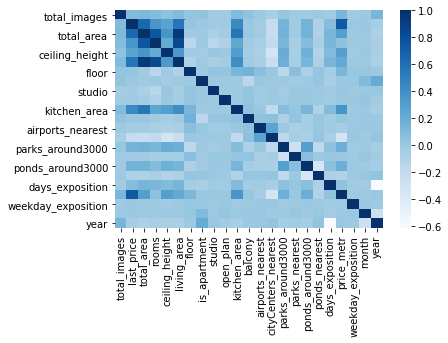

In [78]:
sns.heatmap(corr, cmap='Blues')

In [105]:
table_locality_name = data.groupby('locality_name')['price_metr'].agg(['count', 'mean'])
table_locality_name = table_locality_name.sort_values(by=['count'], ascending=False)
table_locality_name.head(10)

,count,mean
locality_name,,
Санкт-Петербург,15719,114818.511123
посёлок Мурино,590,86087.512050
деревня Кудрово,472,95324.930544
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763


Выделяем квартиры в Санкт-Петербурге и вычисляем среднюю цену каждого километра.
Близость к центру города существенно влияет на стоимость квадратного метра, чем ближе к центру, тем цена за квадратный метр возрастает. Чем дальше от центра, тем цена ниже: каждый киллометр в среднем снижает стоимость квадратного метра на 5000

In [113]:
data_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_spb_table = data_spb.groupby('cityCenters_nearest')['price_metr'].agg(['mean'])
data_spb_table

,mean
cityCenters_nearest,
0.181,195591.194969
0.208,172619.047619
0.215,109900.000000
0.287,88796.296296
0.291,101321.585903
...,...
28.644,85191.334598
28.806,79890.310786
29.263,56526.806527


### Общий вывод

Проанализировав полученные данные, можно сделать следующие выводы:
    1. Чем больше общая и жтлая площадь, цена за квадратный метр квартиры ниже
    2. Площадь кухни не влияет на итоговую стоимость объекта недвижимости
    3. Категория этажности квартиры, значительно влияет на общую стоимость объекта недвижимости, квартиры на первых этажах имеют низкую стоимость (-8-12% процентов от стоимости квартир на других этажах), на последних этажах, так же оцениваются ниже, но выше чем на первых (-5-7%)
    4. Количество комнат существенно влияет на стоимость квартиры (верно для категорий: студии, однокомнатные квартиры, двухкомнатные квартиры, трехкомнатные квартиры), квартир с другим количеством комнат, по сравнению с выборкой вышеперечисленных категорий, очень мало и нельзя сделать по ним объективные выводы. Чем больше комнат в квартире, тем цена за квадратный метр меньше
    5. Зависимость месяца размещения и цены имеет небольшую взаимосвязь, медианная стоимость квадратного метро в течение года варьируется, но это скорее связана с объемом размещенных объявлений, в месяцы активного рынка недвижимости - цена за квадратный метр выше
    6. Зависимость дня недели размещения: в период со вторника по четверг цена выше, в выходные количество размещаемых объявлений значительно ниже и цена за квадратный метр тоже.
Больше всего из перечисленнх факторов на стоимость квадратного метра влияет количество комнат в квартире, а на общую стоимость соответственно площадь квартиры.